# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to display the plot
%matplotlib inline

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
# read the data
df = pd.read_csv("/content/Drive/MyDrive/foodhub_order.csv")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape


(1898, 9)

#### Observations:




*   The dataset has 1898 rows and 9 columns.




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


* The dataset has the following datatypes: Integer, Object, and Float
*   rating, order id and customer id have the wrong datatype.




In [ ]:
# changing rating, order id and customer id datatypes
df['rating'] = df['rating'].replace(['Not given'],0)
df = df.astype({"rating": float, "order_id": object, "customer_id": object})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# let us check for missing values
df.isnull().sum()


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


* There are no missing values in the dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# let us check for the summary statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,1898.0,1477147.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,1898.0,1200.0,52832.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898.0,NaN,NaN,NaN,2.659642,2.19528,0.0,0.0,4.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:




*   The minimum time it takes for food to be prepared once the order is placed is 20 minutes.
*   The average time it takes for food to be prepared once the order is placed is 27.37 minutes.
*   The maximum time it takes for food to be prepared once the order is placed is 35 minutes.



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts()

0.0    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

#### Observations:


*    There are 736 orders not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

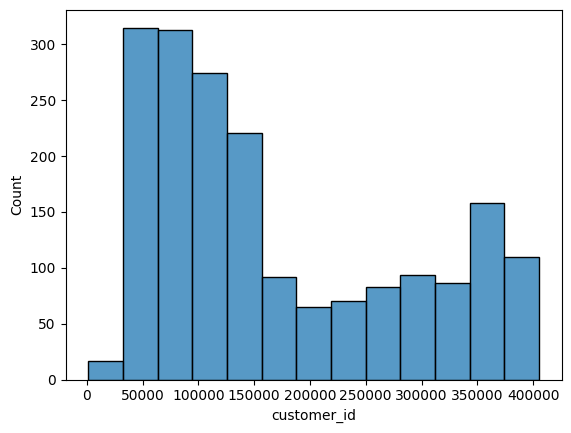

In [ ]:
sns.histplot(data=df, x="customer_id", stat='count')
plt.show()



*   The distribution is skewed to the right.




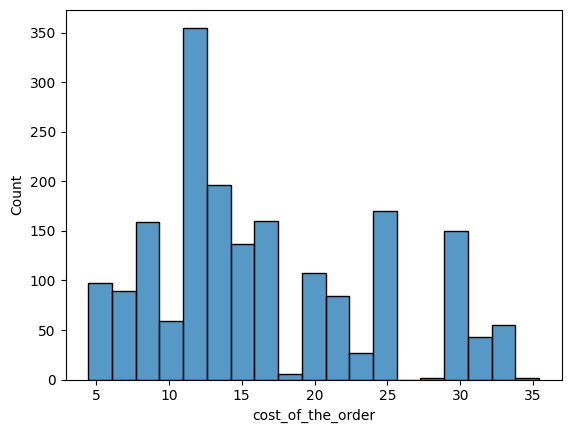

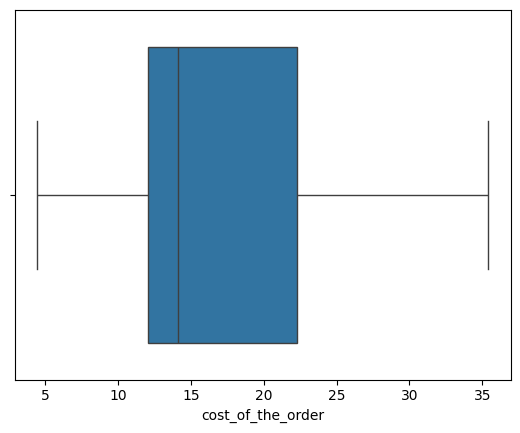

In [ ]:
sns.histplot(data=df, x="cost_of_the_order", stat='count')
plt.show()
sns.boxplot(data=df, x="cost_of_the_order")
plt.show()




*   Most orders cost around 12 dollars
*   There are no outliers present in this column.
*   We notice three modes (5 dollars to 16 dollars ; 20 dollars to 25 dollars ; 30 dollars to 35 dollars)



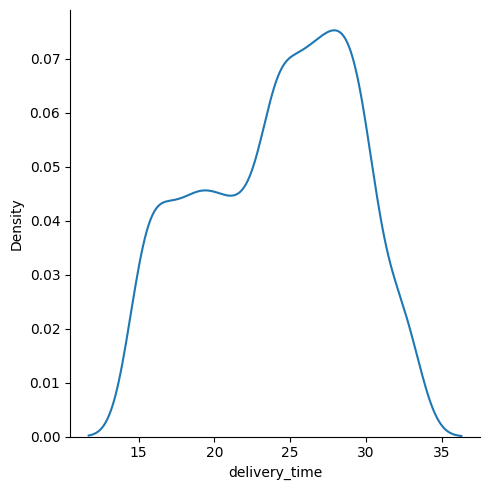

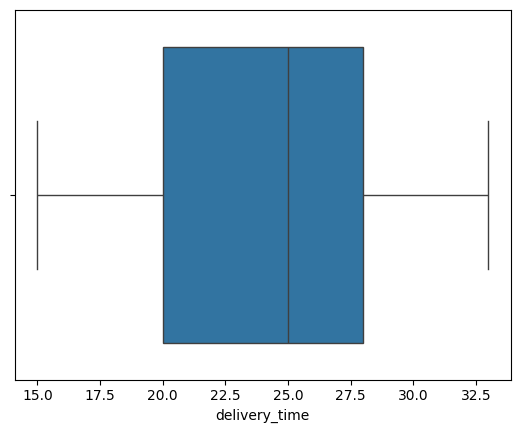

In [ ]:
sns.displot(data=df, x="delivery_time", kind='kde')
plt.show()
sns.boxplot(data=df, x="delivery_time")
plt.show()



*   We noticed two peaks for delivery time.
*   Some orders are delivered between 17 to 22 minutes and other orders are delivered between 25 to 30 minutes.



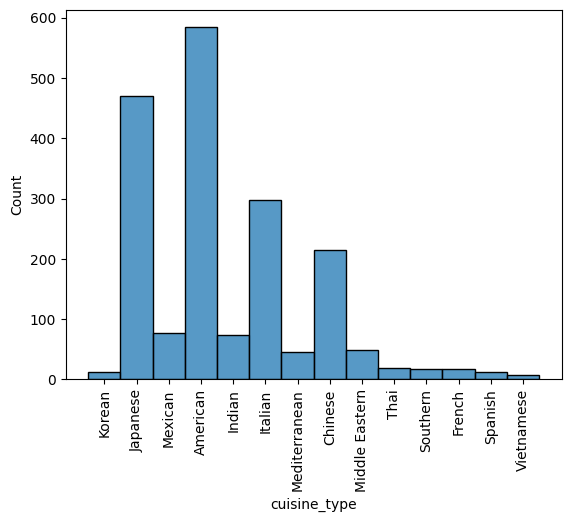

In [ ]:
sns.histplot(data=df, x="cuisine_type", stat='count')
plt.xticks(rotation='vertical')
plt.show()



*   American cuisine has the most demands following by Japanese,Italian, then Chinese.



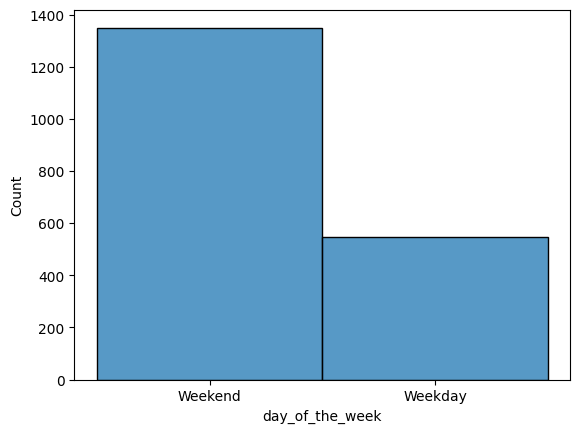

In [ ]:
sns.histplot(data=df, x="day_of_the_week", stat='count')
plt.show()



*   We notice that there are more orders coming on the weekend compared to weekday.




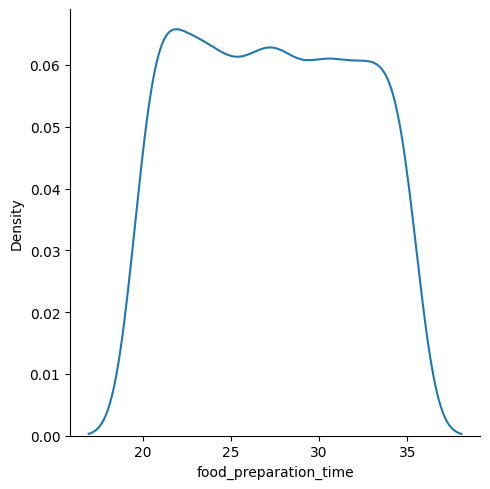

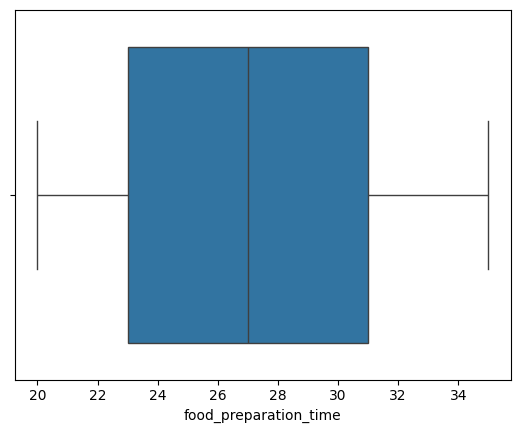

In [ ]:
sns.displot(data=df, x="food_preparation_time", kind='kde')
plt.show()
sns.boxplot(data=df, x="food_preparation_time")
plt.show()



*   Most orders take from 23 to 34 minutes to be ready.




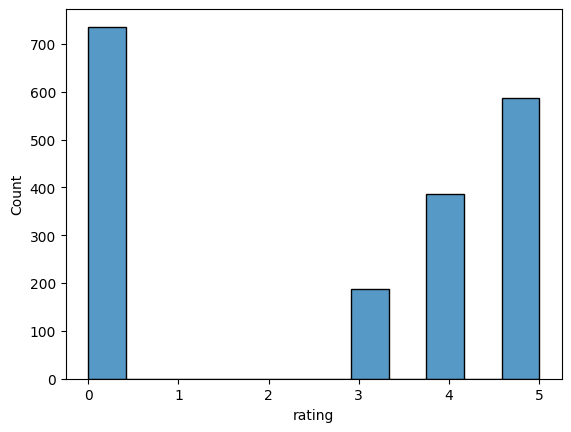

In [ ]:
sns.histplot(data=df, x="rating", stat='count')
plt.show()



*   Most customers have not given a rating.
*   Least amount of customers have given a rating 3



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df.groupby(['restaurant_name'])[['order_id']].count().sort_values('order_id',ascending=False).head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:


the top 5 restaurants in terms of the number of orders received are :

*   Shake Shack
*   The Meatball Shop
*   Blue Ribbon Sushi
*   Blue Ribbon Fried Chicken
*   Parm






### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df.loc[df['day_of_the_week']=="Weekend"]['cuisine_type'].value_counts().head(5)

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations:




*   The most popular cuisine on weekend is American cuisine.




### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
(df.loc[df['cost_of_the_order']>20].shape[0]/df.shape[0]) * 100

29.24130663856691

#### Observations:




*   The percentage of the orders that cost more than 20 dollars is 29.24%




### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:




*   The mean order delivery time is 24.16 minutes.




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df.groupby('customer_id').count()[['order_id']].sort_values('order_id', ascending=False).head(3)

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:


The IDs of the top 3 most frequent customers and the number of orders they placed are :


1.   **customer id** : 52832    **orders placed** : 13
2.   **customer id** : 47440    **orders placed** : 10
3.   **customer id** : 83287    **orders placed** : 9






### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-24-fff17eca42a5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)


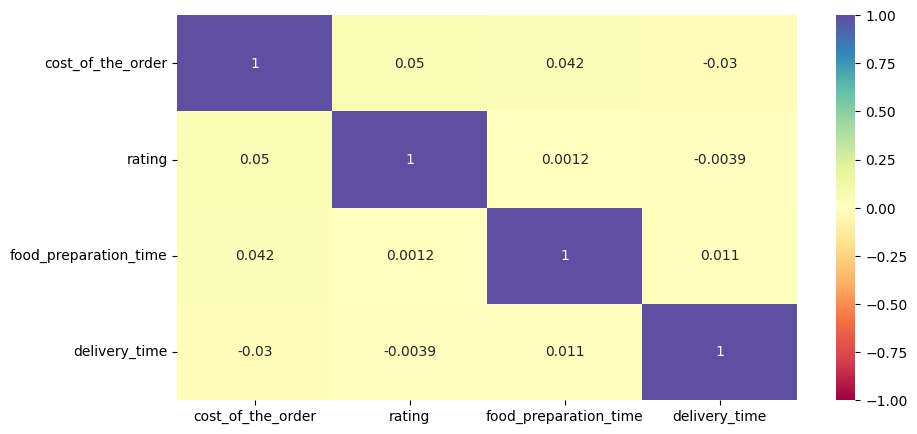

In [ ]:
# correlation between variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

**Observations**:

*   No variables have a high correlation among themselves.
*   the highest correlation is a weak correlation  between cost of order and rating which is 0.05.



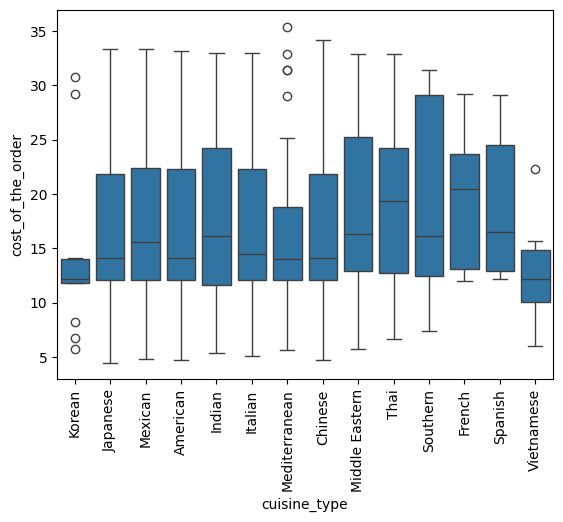

In [ ]:
## price of orders based on the type of cuisine
sns.boxplot(df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation='vertical')
plt.show()

**Observations**:

*   Korean cuisine has a short boxplot which suggest that the prices do not differ that much.
*   French cuisine has a higher median which mean the distribution is negatively skewed and higher prices.
*   Vietnamese cuisine is the most affordable.










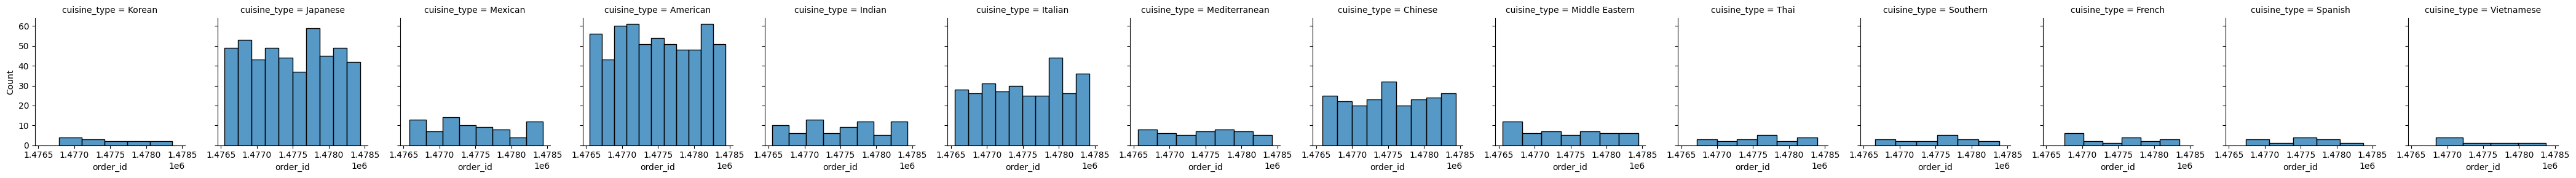

In [ ]:
# what type of cuisine customers like to order the most?
g= sns.FacetGrid(df, col='cuisine_type')
g.map(sns.histplot, "order_id" );

**Observations**:

*   Customers love American cuisine the most, but they also like to order japanese cuisine.





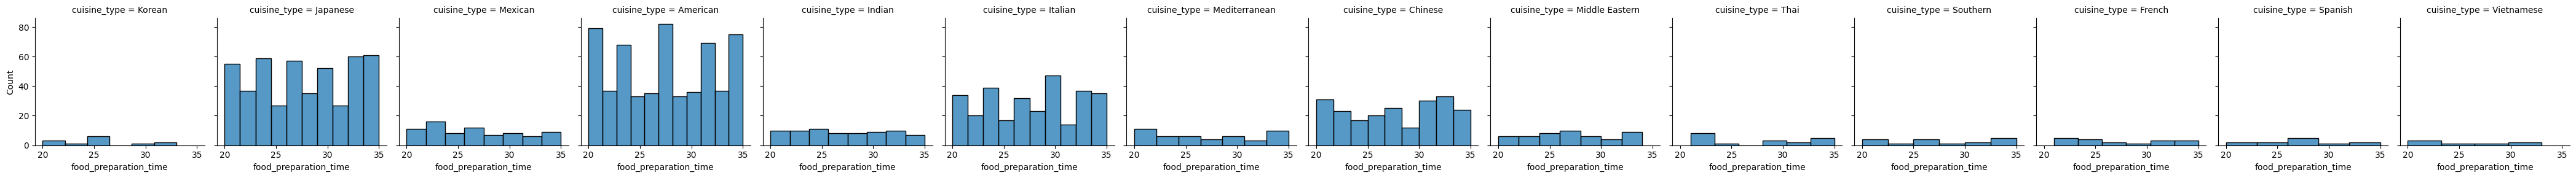

In [ ]:
g= sns.FacetGrid(df, col='cuisine_type')
g.map(sns.histplot, "food_preparation_time" );

**Observations**:

*   American and Japanese cuisine take longer to cook.





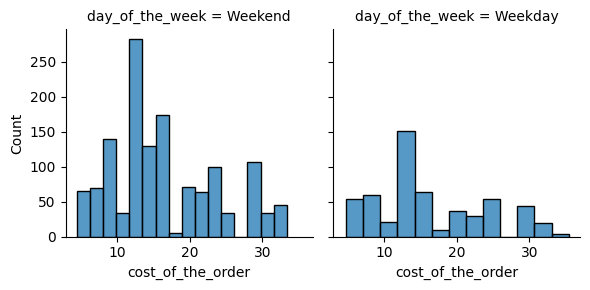

In [ ]:
# price of orders based on day of the week
g= sns.FacetGrid(df, col='day_of_the_week')
g.map(sns.histplot, "cost_of_the_order" );

**Observation**:

*   we can conclude that prices are higher the weekend compared to weekday.




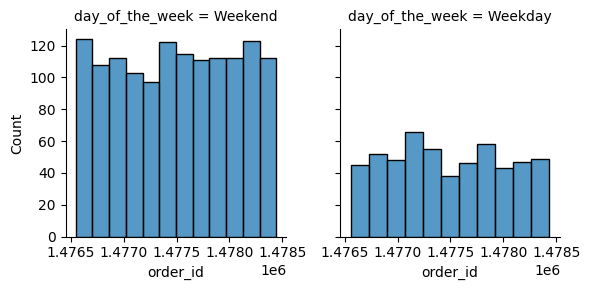

In [ ]:
# what day of the week customers are more likely to order?
g= sns.FacetGrid(df, col='day_of_the_week')
g.map(sns.histplot, "order_id" );

**Observation**:

*   There are more orders on the weekend compared to the weekday, we might understand based on the previous analysis why orders are more expensive on the weekend.




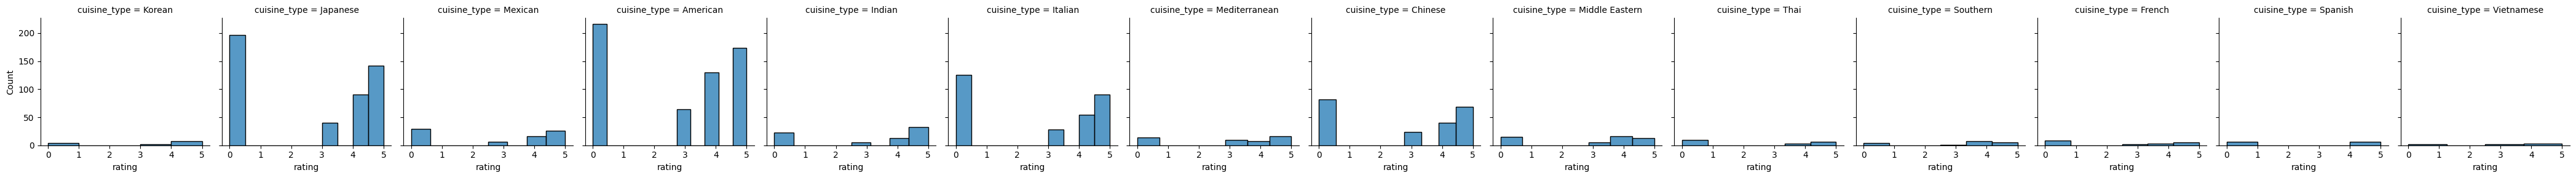

In [ ]:
g= sns.FacetGrid(df, col='cuisine_type')
g.map(sns.histplot, "rating" );

**Observation**:

*   American, Japanese are the most liked cuisine type by customer.
*  On the other hand, a lot of customer have not given any feedback.




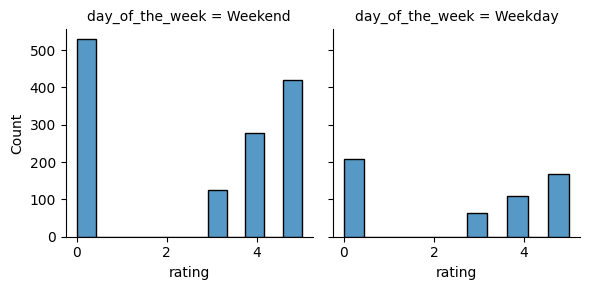

In [ ]:
g= sns.FacetGrid(df, col='day_of_the_week')
g.map(sns.histplot, "rating" );

**Observation**:

*   More feedback on the weekends.




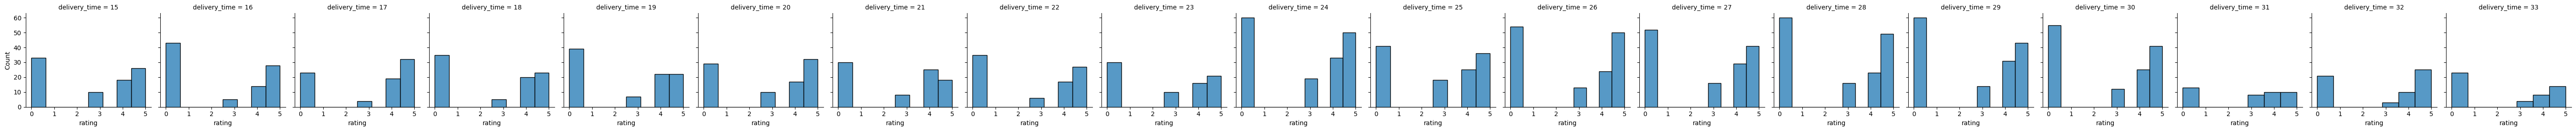

In [ ]:
g= sns.FacetGrid(df, col='delivery_time')
g.map(sns.histplot, "rating" );

**Observation**:

*   The longer the food takes to be delivered, the more ratings are given.




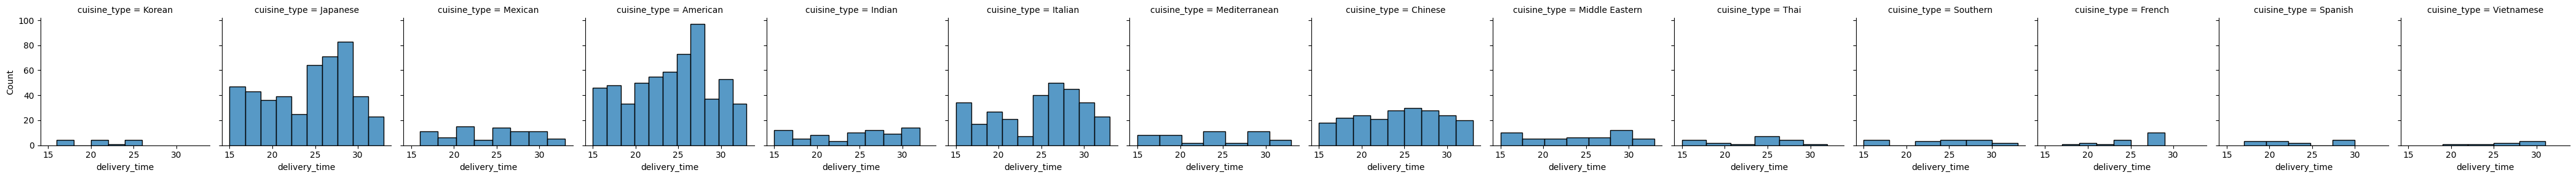

In [ ]:
# How does cuisine type affect delivery time?
g= sns.FacetGrid(df, col='cuisine_type')
g.map(sns.histplot, "delivery_time" );

**Observation**:

*   American, Japanese and Italian take longer to be delivered to the customer.




### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the restaurant by those who do not have rating as 'Not Given'
rating = df.loc[df['rating']!=0]
# Create a dataframe that contains the restaurant names with their value counts
names = pd.DataFrame(rating['restaurant_name'].value_counts())
# All restaurant names with rating count over 50
pd.DataFrame(rating['restaurant_name'].value_counts())>50
names.nlargest(5,['restaurant_name'])
# find the mean rating of the restaurants by using the group by function
updated_df = rating[rating['restaurant_name'].isin(['Shake Shack','The Meatball Shop','Blue Ribbon Sushi','Blue Ribbon Fried Chicken'])]
updated_df.groupby('restaurant_name').mean()[['rating']]

<ipython-input-33-12cad44941e6>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updated_df.groupby('restaurant_name').mean()[['rating']]


,rating
restaurant_name,
Blue Ribbon Fried Chicken,4.328125
Blue Ribbon Sushi,4.219178
Shake Shack,4.278195
The Meatball Shop,4.511905


**Observation**:

The restaurants that will receive the promotional offers are:

*  Blue Ribbon Fried Chicken
*  Blue Ribbon Sushi
*  Shake Shack
*  The Meatball Shop

With the respective means of:

*  4.328125
*  4.219178
*  4.278195
*  4.511905




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# 25% on the orders having cost greater than 20 dollars
above_20 = df.loc[df['cost_of_the_order']>20]
# 15% on the orders having cost greater than 5 dollars
above_5 = df.loc[(df['cost_of_the_order']<20) & (df['cost_of_the_order']>5)]
# the net revenue generated by the company across all orders.
net_revenue = 0.25*above_20['cost_of_the_order'].sum() +  0.15*above_5['cost_of_the_order'].sum()
net_revenue

6166.303

**Observations**:

Charge for cost greater than $20 : 3688.7 dollars

Charge for cost greater than $5 : 2477.6 dollars

Net Revenue : 6166.3 dollars





### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# add a column for total time whic represent the time required to deliver the food to the customer from the time the restaurant receives the order.
df['Total_Time'] = df['food_preparation_time'] + df['delivery_time']
over_60_minutes = df.loc[df['Total_Time']>60]
(over_60_minutes['order_id'].count() / df['order_id'].count())*100

10.537407797681771

#### Observations:

The percentage of orders take more than 60 minutes to get delivered from the time the order is placed is 10.5%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
weekdays = df.loc[df['day_of_the_week']=='Weekday']
weekends = df.loc[df['day_of_the_week']=='Weekend']

weekdays['delivery_time'].mean()
weekends['delivery_time'].mean()

22.4700222057735

#### Observations:

the mean values of delivery time for the orders placed on weekdays and at the weekend.

*  weekdays: 28.34
*  weekends: 22.47


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Customers are more likely to order food on the weekends.
*  Customers tend to give a lower rating when their food takes a long time to be delivered.

### Recommendations:

*  Make customers give their feedback by proposing some discount after a given feedback.
*  Reduce the delivery time of popular cuisine by hiring more drivers.
*  Reduce the cooking time of popular cuisine by hiring more cooks.
*  create an inventory list of loyal customers.
*  send out emails to customers during weekdays for promotional offers.

In [ ]:
# Convert to HTML
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html PYF_Project_LearnerNotebook_FullCode.ipynb

[NbConvertApp] Converting notebook PYF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 1302226 bytes to PYF_Project_LearnerNotebook_FullCode.html


---